#### Project for Startup prediction

 Startups play a major role in economic growth. They bring new ideas, spur innovation, create employment thereby moving the economy. There has been an exponential growth in startups over the past few years.
 
 
 
Objective---
The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.




status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv(r"C:\Users\dtdee\OneDrive\Desktop\Letsupgrade_Python\Data_Analysis_Visualisation\startup data.csv")

In [ ]:
df.head(2)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired


In [ ]:
# Now using the pandas features we will try to check all the columns in detail.

pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1])

In [ ]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01-01-2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08-01-2010,10-01-2012,08-01-2010,04-01-2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
#First step we would like to drop all the unnecessary columns from the data which is a part of Feature Engineering

df.drop(columns=['Unnamed: 0','zip_code','id','Unnamed: 6','labels','state_code.1','object_id','is_CA'],inplace=True)

In [ ]:
df.shape

(923, 41)

In [ ]:
# Checking the basic info of the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   city                      923 non-null    object 
 4   name                      923 non-null    object 
 5   founded_at                923 non-null    object 
 6   closed_at                 335 non-null    object 
 7   first_funding_at          923 non-null    object 
 8   last_funding_at           923 non-null    object 
 9   age_first_funding_year    923 non-null    float64
 10  age_last_funding_year     923 non-null    float64
 11  age_first_milestone_year  771 non-null    float64
 12  age_last_milestone_year   771 non-null    float64
 13  relationships             923 non-null    int64  
 14  funding_ro

In [ ]:
# checking the basic statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,923.0,3.851744e+01,3.741497e+00,25.752358,3.738887e+01,3.777928e+01,4.073065e+01,5.933523e+01
longitude,923.0,-1.035392e+02,2.239417e+01,-122.756956,-1.221987e+02,-1.183740e+02,-7.721473e+01,1.805712e+01
age_first_funding_year,923.0,2.235630e+00,2.510449e+00,-9.046600,5.767000e-01,1.446600e+00,3.575350e+00,2.189590e+01
age_last_funding_year,923.0,3.931456e+00,2.967910e+00,-9.046600,1.669850e+00,3.528800e+00,5.560250e+00,2.189590e+01
age_first_milestone_year,771.0,3.055353e+00,2.977057e+00,-14.169900,1.000000e+00,2.520500e+00,4.686300e+00,2.468490e+01
age_last_milestone_year,771.0,4.754423e+00,3.212107e+00,-7.005500,2.411000e+00,4.476700e+00,6.753400e+00,2.468490e+01
relationships,923.0,7.710726e+00,7.265776e+00,0.000000,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,923.0,2.310943e+00,1.390922e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
funding_total_usd,923.0,2.541975e+07,1.896344e+08,11000.000000,2.725000e+06,1.000000e+07,2.472500e+07,5.700000e+09
milestones,923.0,1.841820e+00,1.322632e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00


In [ ]:
# We see that the datatype of the date columns are not in proper type so we will convert that datatype into datetime format

for i in df.columns:
    if i in ['founded_at','closed_at','first_funding_at','last_funding_at']:
        df[i]=df[i].astype('datetime64')

In [ ]:
# Now  we will take the year fromm the mentioned date just to simplify our data for better understanding

for i in df.columns:
    if i in ['founded_at','closed_at','first_funding_at','last_funding_at']:
        df[i]=df[i].dt.year

In [ ]:
df.head()

,state_code,latitude,longitude,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2007,NaN,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,2000,NaN,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,San Diego,Plixi,2009,NaN,2010,2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,Cupertino,Solidcore Systems,2002,NaN,2005,2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,San Francisco,Inhale Digital,2010,2012.0,2010,2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
# checking the missing values in each column in the dataset

df.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
city                          0
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

In [ ]:
df.head(2)

,state_code,latitude,longitude,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2007,NaN,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,2000,NaN,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,acquired


In [ ]:
#We see there is so many negative values in the columns of age_milestone 
# so we will try to remove all the negative values as age cannot be negative

# df['age_first_milestone_year'].unique().round(1)

In [ ]:

for i in df.columns:
    if i in ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']:
        df[i].apply(lambda x:x if x>0 else 0 )

In [ ]:
# Now we will try to handle all the missing values columnwise
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean(),inplace=True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mean(),inplace=True)


In [ ]:
df.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
city                          0
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

In [ ]:
# Since there is some missing values in closed_at column so we assume that the venture is still active and we will fill values with some future random year.

df['closed_at'].fillna(2050,inplace=True)

In [ ]:
df['closed_at'].unique()

array([2050., 2012., 2009., 2011., 2010., 2008., 2013., 2001., 2005.,
       2007.])

In [ ]:
df['founded_at'].min(), df['founded_at'].max()

(1984, 2013)

In [ ]:
df['closed_at'].min(), df['closed_at'].max()

(2001.0, 2050.0)

In [ ]:
#Applying feature engineering to calculate the total age of the startups


df['Startup_age']=df['closed_at']-df['founded_at']

In [1]:
#We can create bins by checking the age of the startups by applying either pd.cut() method or using the lambda function


# df['Startup_age']

In [ ]:
#We will apply lambda funtion on startup_age to calculate the new column

df['Running_Postion']=df['Startup_age'].apply(lambda x: 'Failed' if x<5.0 else 'Still_Functional' if 5.0<x<25.0 else 'Successfull')

In [ ]:
df.head(5)

,state_code,latitude,longitude,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,Startup_age,Running_Postion
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2007,2050.0,2009,2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired,43.0,Successfull
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,2000,2050.0,2005,2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired,50.0,Successfull
2,CA,32.901049,-117.192656,San Diego,Plixi,2009,2050.0,2010,2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired,41.0,Successfull
3,CA,37.320309,-122.050040,Cupertino,Solidcore Systems,2002,2050.0,2005,2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired,48.0,Successfull
4,CA,37.779281,-122.419236,San Francisco,Inhale Digital,2010,2012.0,2010,2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed,2.0,Failed


In [ ]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_NY', 'is_MA',
       'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web',
       'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
       'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500', 'status', 'Startup_age',
       'Running_Postion'],
      dtype='object')

In [ ]:
df=df[['state_code', 'latitude', 'longitude', 'city', 'name',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_NY', 'is_MA',
       'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web',
       'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
       'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory',
       'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'avg_participants', 'is_top500',
       'Running_Postion','status']]

In [ ]:
df.head()

,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Running_Postion,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,Successfull,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,Successfull,acquired
2,CA,32.901049,-117.192656,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,Successfull,acquired
3,CA,37.320309,-122.050040,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,Successfull,acquired
4,CA,37.779281,-122.419236,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,Failed,closed


In [ ]:

df.groupby('Running_Postion').count()['is_top500']




Running_Postion
Failed              147
Still_Functional    146
Successfull         630
Name: is_top500, dtype: int64

<AxesSubplot: xlabel='Running_Postion', ylabel='count'>

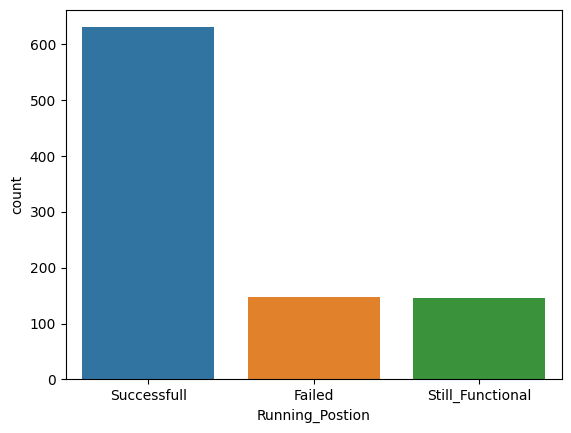

In [ ]:
sns.countplot(x=df['Running_Postion'])

In [ ]:
#Top 10  cities having maximum startups

df.head()


,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Running_Postion,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,Successfull,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,Successfull,acquired
2,CA,32.901049,-117.192656,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,Successfull,acquired
3,CA,37.320309,-122.050040,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,Successfull,acquired
4,CA,37.779281,-122.419236,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,Failed,closed


In [ ]:
p=df['city'].value_counts().head(10)

<AxesSubplot: >

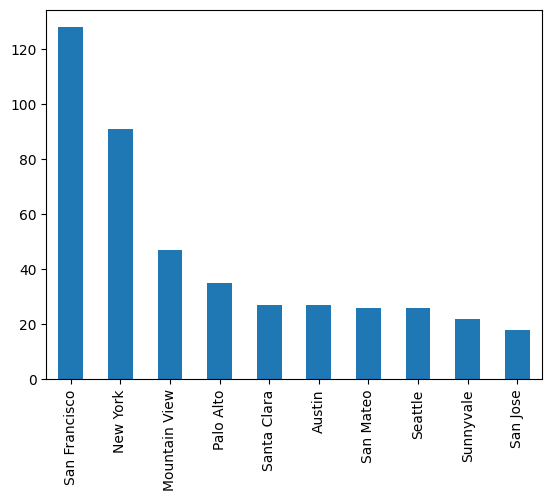

In [ ]:
p.plot(kind='bar')

In [ ]:
#All startups which are not closed yet used total funding in them  in USD
df.head(2)

,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Running_Postion,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,Successfull,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,Successfull,acquired


In [ ]:
q=df.groupby('Running_Postion').sum()['funding_total_usd']
q

Running_Postion
Failed                891341527
Still_Functional     3176213506
Successfull         19394873379
Name: funding_total_usd, dtype: int64

<AxesSubplot: ylabel='funding_total_usd'>

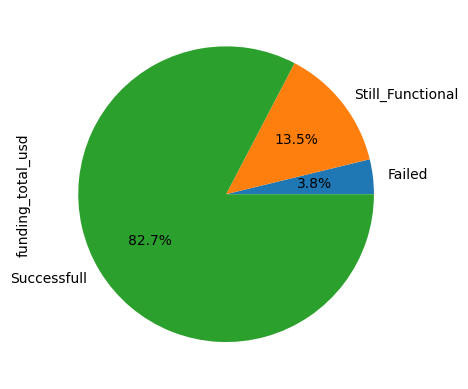

In [ ]:
q.plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df.head(2)

,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Running_Postion,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,Successfull,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,Successfull,acquired


In [ ]:
#Top 15 states with maximum funding done

x=df.groupby('state_code').sum()['funding_rounds'].sort_values(ascending=False)[0:15]
x

state_code
CA    1134
NY     248
MA     221
TX      92
WA      88
CO      51
IL      38
PA      32
VA      30
GA      25
NC      22
MD      17
NJ      16
OR      11
MN      11
Name: funding_rounds, dtype: int64

<AxesSubplot: xlabel='state_code'>

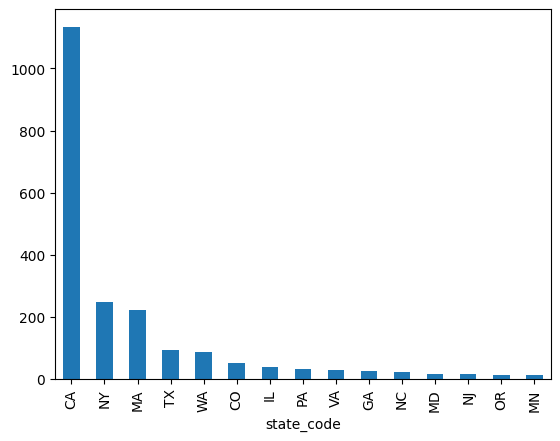

In [ ]:
x.plot(kind='bar')

In [ ]:
df.head(2)

,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Running_Postion,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,Successfull,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,Successfull,acquired


<AxesSubplot: xlabel='avg_participants', ylabel='category_code'>

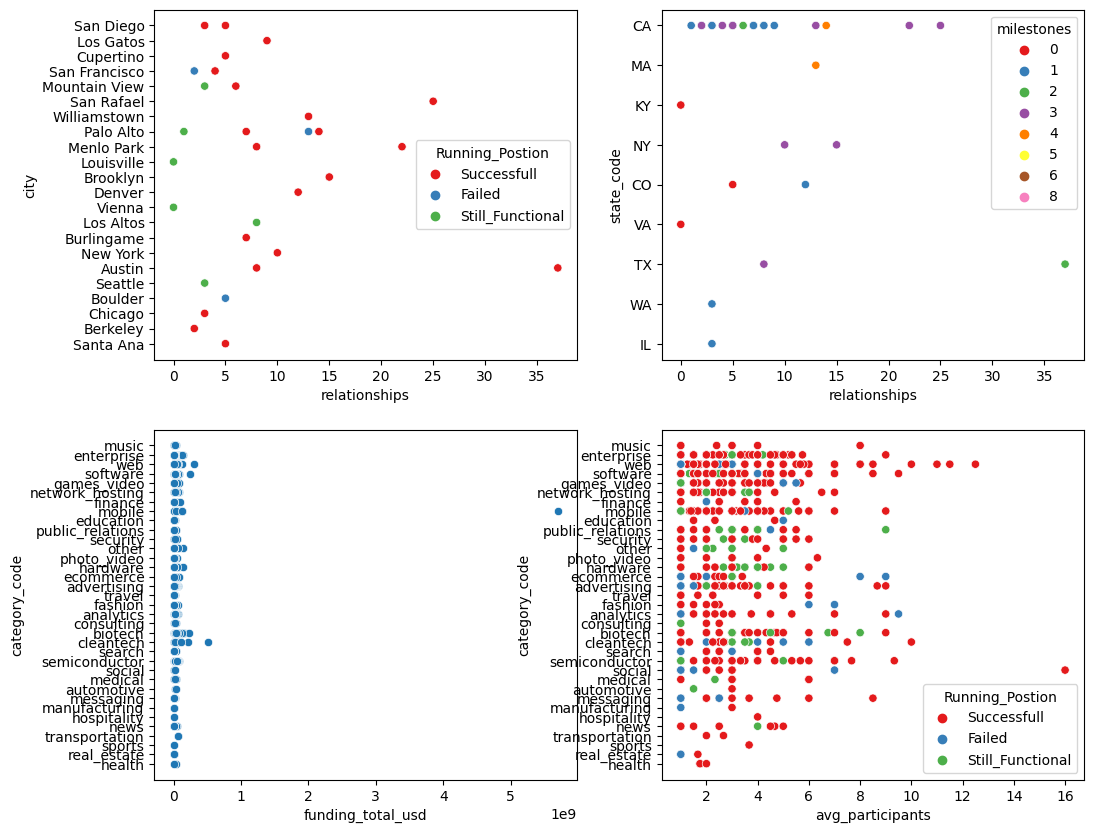

In [ ]:
#Checking the relationship between variables and using hue parameter to highlight the values of hue

# plt.figure(figsize=(12,9))

fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.scatterplot(y=df['city'][0:30],x='relationships',hue='Running_Postion',data=df,palette='Set1',ax=axes[0,0])
sns.scatterplot(y=df['state_code'][0:30],x='relationships',hue='milestones',data=df,palette='Set1',ax=axes[0,1])
sns.scatterplot(y=df['category_code'],x='funding_total_usd',data=df,palette='Set2',ax=axes[1,0])
sns.scatterplot(y=df['category_code'],x='avg_participants',hue='Running_Postion',data=df,palette='Set1',ax=axes[1,1])

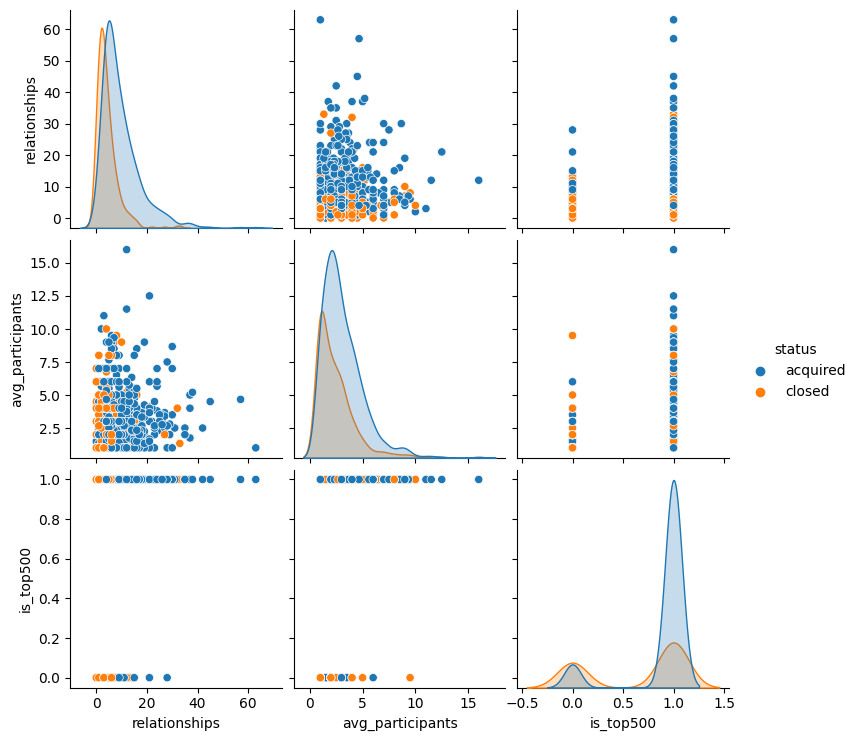

In [ ]:
#Sns.pairplot is a method in which you can check and compare varibles of dtype numeric only in the given dataframe

categorical=df[['state_code','city','name','status','category_code','relationships','avg_participants','is_top500']]

sns.pairplot(categorical,hue='status')


Now we will Try to import all the necessary modules from SKLEARN Library and prepare dataset ready to feed into Machine learning model

In [ ]:
df.head(2)

,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Running_Postion,status
0,CA,42.358880,-71.056820,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,Successfull,acquired
1,CA,37.238916,-121.973718,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,Successfull,acquired


In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [ ]:
# Now we will try to label encode all the columns which are categorical in th dataframe.

encoder=LabelEncoder()

In [ ]:
for i in df.columns:
    if i in ['state_code','city','name','status','category_code','Running_Postion','status']:
        df[i]=encoder.fit_transform(df[i])

In [ ]:
df.head()

,state_code,latitude,longitude,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,Running_Postion,status
0,2,42.358880,-71.056820,173,75,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,0,0,0,19,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,2,0
1,2,37.238916,-121.973718,108,781,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,0,0,0,8,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,2,0
2,2,32.901049,-117.192656,173,585,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,0,0,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,2,0
3,2,37.320309,-122.050040,55,712,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,2,0
4,2,37.779281,-122.419236,174,351,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,1


In [ ]:
#Now we will split or data into Dependent and independent variables as iloc function is used in data slicing based on their integer values or indexes

X= df.iloc[:,:-1]
Y= df.iloc[:,37:].values

In [ ]:
X.shape,Y.shape

((923, 37), (923, 1))

In [ ]:
#Normalising the data

scaler= MinMaxScaler()

In [ ]:
X_scaled= scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.05882353, 0.49449377, 0.36715176, ..., 0.        , 0.        ,
        1.        ],
       [0.05882353, 0.34203618, 0.00556221, ..., 0.25      , 1.        ,
        1.        ],
       [0.05882353, 0.21286716, 0.03951523, ..., 0.2       , 1.        ,
        1.        ],
       ...,
       [0.05882353, 0.34707878, 0.00526251, ..., 0.46666667, 1.        ,
        0.5       ],
       [0.05882353, 0.35149982, 0.00332764, ..., 0.        , 1.        ,
        1.        ],
       [0.05882353, 0.34643908, 0.00561506, ..., 0.13333333, 1.        ,
        1.        ]])

In [ ]:
#Splitting the data into train and test dataset


X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.20,random_state=30)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((738, 37), (185, 37), (738, 1), (185, 1))

### Using Logistic Regression Method to Train and Test and Check the accuracy by Different Metrics

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
reg=LogisticRegression(random_state=10,fit_intercept=True)

In [ ]:
reg.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
acc_logreg =accuracy_score(y_pred,y_test)
acc_logreg

0.9567567567567568

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       129
           1       0.89      0.98      0.93        56

    accuracy                           0.96       185
   macro avg       0.94      0.96      0.95       185
weighted avg       0.96      0.96      0.96       185



In [ ]:
# So Cross Val score bascially selects random data sets in all 5 iterations and then we calculate the average accuracy of all the 5 accuracies that have been shown 


cv=cross_val_score(reg,X_train,y_train,cv=5)
cv.mean()

0.9376447876447876

In [ ]:
reg.classes_

array([0, 1])

In [ ]:
cm= confusion_matrix(y_pred,y_test)
cm

array([[122,   7],
       [  1,  55]], dtype=int64)

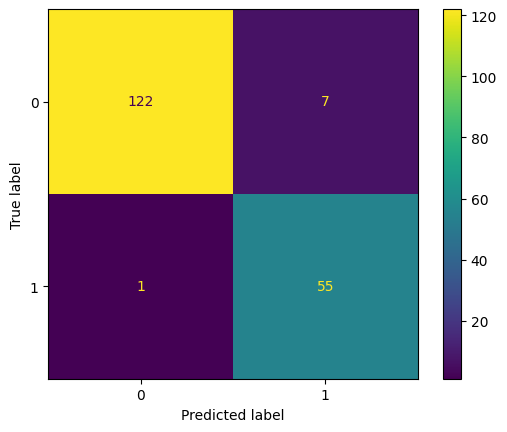

In [ ]:
# Please note  ::   0--> acquired, 1--> closed

cnf= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=reg.classes_)
cnf.plot()
plt.show()

## Using KNN Classification Algorithm to Predict

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
# Example: Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. 
# So for this identification, we can use the KNN algorithm, as it works on a similarity measure. 
# Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.
# Default value of k=5 as we can change it. New datapoint calculated 5 nearest ecludian distance data of both classses and it will belong to that class to which maxum data points count.



knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")

In [ ]:
# Train the model using the train datasets


knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#Now that the model is trained we will test the model using the Test data

y_pred=knn.predict(X_test)

In [ ]:
acc_knn= accuracy_score(y_pred,y_test)
acc_knn

0.8486486486486486

In [ ]:
# So Cross Val score bascially selects random data sets in all 5 iterations and then we calculate the average accuracy of all the 5 accuracies that have been shown 


cvl= cross_val_score(knn,X_train,y_train,cv=5)
cvl.mean()

0.8021695164552307

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       137
           1       0.66      0.85      0.75        48

    accuracy                           0.85       185
   macro avg       0.80      0.85      0.82       185
weighted avg       0.87      0.85      0.85       185



## Using Decision Tree Algorithm 

In [ ]:
## It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
# In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. 
# Decision nodes are used to make any decision and have multiple branches, 
# whereas Leaf nodes are the output of those decisions and do not contain any further branches.
#To solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, 
# we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:
# Information Gain = Entropy(S)- [(Weighted Avg) *Entropy(each feature) 
# Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)
# Gini Index= 1- ∑iPi2(2 is square)


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
dt= DecisionTreeClassifier(criterion='gini', max_depth=4)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred= dt.predict(X_test)

In [ ]:
acc_dt=accuracy_score(y_pred,y_test)
acc_dt

0.9621621621621622

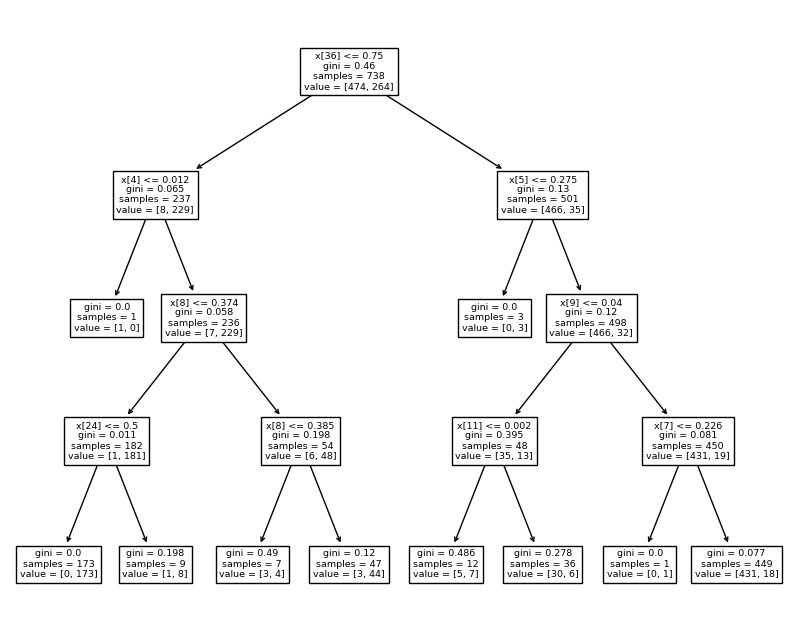

In [ ]:
#Visualising the tree


plt.figure(figsize=(10,8))
plot_tree(dt)
plt.plot()
plt.show()

## Using Random Forest Algorithm 

In [ ]:
#"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."
# Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
# The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.


from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(n_estimators=100,criterion='gini',oob_score=True)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
acc_rf= accuracy_score(y_pred,y_test)
acc_rf

0.9621621621621622

In [ ]:
#Checking the oob samples from the dataset is more important to check the validation score while testing
#Getting the accuracy of the model from the out of bag sample data that is not fed to model during training.
# Please note in ensemble model it is found that only 63% of data is fed for training and rest is oob for testing.


rf.oob_score_

0.9471544715447154

# Using the Support Vector Machine Algorithm

In [ ]:
# Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression.
#  Though we say regression problems as well it’s best suited for classification.
# The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different
# classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible.
#  The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. 
#  If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three.


from sklearn.svm import SVC

In [ ]:
svm= SVC(kernel='rbf',max_iter=50)

In [ ]:
svm.fit(X_train,y_train)

SVC(max_iter=50)

In [ ]:
y_pred=svm.predict(X_test)

In [ ]:
acc_svm= accuracy_score(y_pred,y_test)
acc_svm

0.827027027027027

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       103
           1       0.90      0.68      0.78        82

    accuracy                           0.83       185
   macro avg       0.85      0.81      0.82       185
weighted avg       0.84      0.83      0.82       185



# Using Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gauss= GaussianNB()

In [ ]:
gauss.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gauss.predict(X_test)

In [ ]:
acc_gauss=accuracy_score(y_pred,y_test)
acc_gauss

0.8432432432432433

In [ ]:
Accuracy_all= pd.DataFrame({'Model_Name':['Logistic_Regression','Naive_Bayes','KNN','Decision_Tree','Random_Forest','SVM'],
                                 'Score':[acc_logreg,acc_gauss,acc_knn,acc_dt,acc_rf,acc_svm]})

Accuracy_all

,Model_Name,Score
0,Logistic_Regression,0.956757
1,Naive_Bayes,0.843243
2,KNN,0.848649
3,Decision_Tree,0.962162
4,Random_Forest,0.962162
5,SVM,0.827027
